In [15]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Créer le dossier results
os.makedirs("results/preprocessing", exist_ok=True)


In [16]:
dataset_path = r"C:\Users\user\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1"
train_dir = os.path.join(dataset_path, "Training")
test_dir = os.path.join(dataset_path, "Testing")

In [17]:
# Définir les transformations
IMG_SIZE = 224  # ConvNeXt attend un input de 224x224 (taille d'entée)

# Transformations pour le training (avec augmentation)
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Transformations pour le test (pas d'augmentation)
test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [18]:
# Créer les datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

class_names = train_dataset.classes
print("Classes :", class_names)

Classes : ['glioma', 'meningioma', 'notumor', 'pituitary']


In [19]:
# Créer les DataLoaders
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Nombre de batches train: {len(train_loader)}")
print(f"Nombre de batches test: {len(test_loader)}")

Nombre de batches train: 179
Nombre de batches test: 41


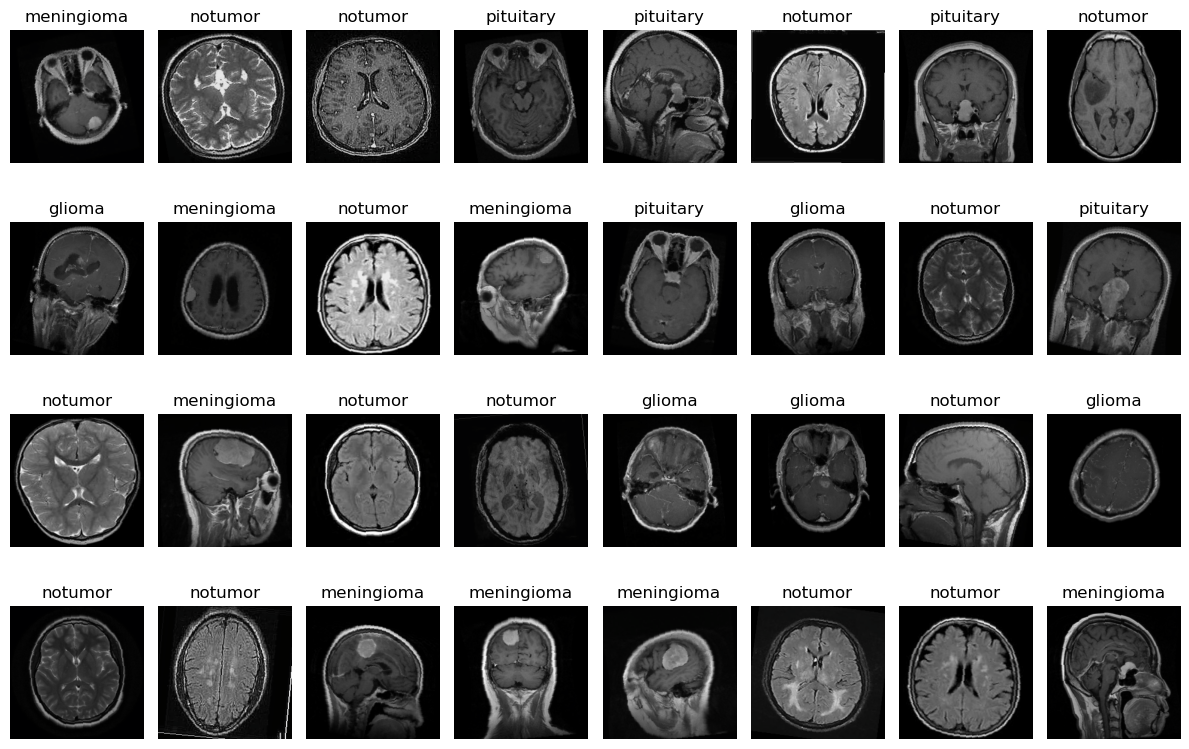

In [20]:
# Vérifier un batch d’images
def imshow_batch(images, labels):
    images = images.numpy().transpose((0, 2, 3, 1))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    images = std * images + mean  # dé-normaliser
    images = np.clip(images, 0, 1)

    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(4, 8, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.tight_layout()
    plt.savefig("results/preprocessing/sample_batch.png")
    plt.show()

# Récupérer un batch
images, labels = next(iter(train_loader))
imshow_batch(images, labels)

In [21]:
import pandas as pd

train_counts = {cls: 0 for cls in class_names}
test_counts = {cls: 0 for cls in class_names}

for _, labels in train_loader:
    for l in labels:
        train_counts[class_names[l]] += 1

for _, labels in test_loader:
    for l in labels:
        test_counts[class_names[l]] += 1

summary = pd.DataFrame({
    "Classe": class_names,
    "Train": [train_counts[c] for c in class_names],
    "Test": [test_counts[c] for c in class_names]
})

summary.to_csv("results/preprocessing/dataset_summary.csv", index=False)
summary


,Classe,Train,Test
0,glioma,1321,300
1,meningioma,1339,306
2,notumor,1595,405
3,pituitary,1457,300
